# Testing different Hyperparameters

Lets say we want to learn more about __how different learning rates and different image sizes affect our model's accuracy when restricted to 10 epochs__, and we want to build an experiment to test out these hyperparameters.

In this notebook, we'll walk through how we use out Experiment module with the following:

- use python to perform this experiment
- use the CLI to perform this experiment
- evalute the results using Pandas

---

In [1]:
import sys
sys.path.append("../")
import os

from utils_ic import ic_root_path
from utils_ic.datasets import unzip_url, Urls
from utils_ic.experiment import *

Lets download some data that we want to test on. To use the experiments tool for single label classification, we'll need to make sure that the data is stored such that images are sorted into their classes inside of a subfolder. In this notebook, we'll use the Fridge Objects dataset provided in `utils_ic.datasets.Urls`, which is stored in the correct format.

In [2]:
input_data = unzip_url(Urls.fridge_objects_path, exist_ok=True)

## Using Python

We start by creating the Benchmark object:

In [3]:
exp = Experiment()

Before we start testing, it's a good idea to see what the default parameters. We can use a the property `parameters` to easily see those default values.

In [4]:
exp.parameters

OrderedDict([('learning_rate', [0.0001]),
             ('epochs', [15]),
             ('batch_size', [16]),
             ('im_size', [299]),
             ('architecture',
              [<Architecture.resnet18: functools.partial(<function resnet18 at 0x7f7dffd4e488>)>]),
             ('transform', [True]),
             ('dropout', [0.5]),
             ('weight_decay', [0.01]),
             ('training_schedule',
              [<TrainingSchedule.head_first_then_body: 3>]),
             ('discriminative_lr', [True]),
             ('one_cycle_policy', [True])])

Now that we know the defaults, we can pass it the parameters we want to test. 

In this notebook, we want to see the effect of different learning rates across different image sizes using only 8 epochs (the default number of epochs is 15). To do so, I would run the `update_parameters` functions as follows:

```python
exp.update_parameters(
    learning_rate=[1e-3, 1e-4, 1e-5], 
    im_size=[99, 299], 
    epochs=[8]
)
```

Notice that all parameters must be passed in as a list, including single values such as `epochs=[8]`.

These parameters will be used to calculate the number of permutations to run. In this case, we've passed in `learning_rate=[1e-3, 1e-4, 1e-5]`, `im_size=[99, 299]`, and `epochs=[8]`. This will result in 3 X 2 X 1 total permutations (in otherwords, 6 permutations). 

In [5]:
exp.update_parameters(learning_rate=[1e-3, 1e-4, 1e-5], im_size=[299, 499], epochs=[8])

Now that we have our parameters defined, we call the `run()` function with the dataset to test on. 

We can also optionally pass in:
- the number of repetitions to run each permutation (default is 3)
- whether or not we want the training to stop early if the metric (accuracy) doesn't improve by 0.01 (1%) over 3 epochs (default is False)

The `run` function returns a multi-index dataframe which we can work with right away.

In [6]:
df = exp.run(datasets=[input_data], reps=3); df

this Learner object self-destroyed - it still exists, but no longer usable


duration  \
0 PARAMETERS [learning_rate: 0.0001]|[epochs: 8]|... fridgeObjects  31.410849   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 8]|... fridgeObjects  38.718033   
  PARAMETERS [learning_rate: 0.001]|[epochs: 8]|[... fridgeObjects  37.852972   
  PARAMETERS [learning_rate: 0.001]|[epochs: 8]|[... fridgeObjects  44.820808   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 8]|[... fridgeObjects  30.239053   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 8]|[... fridgeObjects  37.803058   
1 PARAMETERS [learning_rate: 0.0001]|[epochs: 8]|... fridgeObjects  26.006287   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 8]|... fridgeObjects  36.419786   
  PARAMETERS [learning_rate: 0.001]|[epochs: 8]|[... fridgeObjects  28.395461   
  PARAMETERS [learning_rate: 0.001]|[epochs: 8]|[... fridgeObjects  43.805897   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 8]|[... fridgeObjects  30.652590   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 8]|[... fridgeObjects  37.239413   
2 PARAMETERS [learning_rate: 0.0001]|[epochs: 8]|... fridgeObjects  31.896873   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 8]|... fridgeObjects  39.929393   
  PARAMETERS [learning_rate: 0.001]|[epochs: 8]|[... fridgeObjects  30.885216   
  PARAMETERS [learning_rate: 0.001]|[epochs: 8]|[... fridgeObjects  43.662686   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 8]|[... fridgeObjects  32.134002   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 8]|[... fridgeObjects  39.723982   

                                                                    accuracy  
0 PARAMETERS [learning_rate: 0.0001]|[epochs: 8]|... fridgeObjects  0.931818  
  PARAMETERS [learning_rate: 0.0001]|[epochs: 8]|... fridgeObjects  0.977273  
  PARAMETERS [learning_rate: 0.001]|[epochs: 8]|[... fridgeObjects  0.863636  
  PARAMETERS [learning_rate: 0.001]|[epochs: 8]|[... fridgeObjects  0.954545  
  PARAMETERS [learning_rate: 1e-05]|[epochs: 8]|[... fridgeObjects  0.977273  
  PARAMETERS [learning_rate: 1e-05]|[epochs: 8]|[... fridgeObjects  0.931818  
1 PARAMETERS [learning_rate: 0.0001]|[epochs: 8]|... fridgeObjects  1.000000  
  PARAMETERS [learning_rate: 0.0001]|[epochs: 8]|... fridgeObjects  0.977273  
  PARAMETERS [learning_rate: 0.001]|[epochs: 8]|[... fridgeObjects  0.772727  
  PARAMETERS [learning_rate: 0.001]|[epochs: 8]|[... fridgeObjects  0.909091  
  PARAMETERS [learning_rate: 1e-05]|[epochs: 8]|[... fridgeObjects  0.977273  
  PARAMETERS [learning_rate: 1e-05]|[epochs: 8]|[... fridgeObjects  0.977273  
2 PARAMETERS [learning_rate: 0.0001]|[epochs: 8]|... fridgeObjects  0.954545  
  PARAMETERS [learning_rate: 0.0001]|[epochs: 8]|... fridgeObjects  0.954545  
  PARAMETERS [learning_rate: 0.001]|[epochs: 8]|[... fridgeObjects  0.931818  
  PARAMETERS [learning_rate: 0.001]|[epochs: 8]|[... fridgeObjects  1.000000  
  PARAMETERS [learning_rate: 1e-05]|[epochs: 8]|[... fridgeObjects  0.931818  
  PARAMETERS [learning_rate: 1e-05]|[epochs: 8]|[... fridgeObjects  0.931818

## Using the CLI

Instead of using python to run this experiment, we may want to test from the CLI. We can do so by using the `scripts/benchmark.py` file. 

First we move up to the `/image_classification` directory.

In [7]:
os.chdir(ic_root_path())

To reproduce the same test (different learning rates across different image sizes using only 8 epochs), and the same settings (3 repetitions, and no early_stopping) we can run the following:

```sh
python scripts/benchmark.py 
    --learning-rates 1e-3 1e-4 1e-5
    --im-size 99 299
    --epochs 5 
    --repeat 3 
    --no-early-stopping 
    --inputs <my-data-dir>
    --output lr_bs_test.csv
```

Additionally, we've added an output parameter, which will automatically dump our dataframe into a csv file.

To simplify the command, we can use the acryonyms of the params. We can also remove `--no-early-stopping` as that is the default behavior.

```sh
python scripts/benchmark.py -lr 1e-3 1e-4 1e-5 -is 99 299 -e 5 -i <my-data-dir> -o lr_bs_test.csv
```

HINT: You can learn more about how to use the script: `python script/benchmark.py --help`

In [ ]:
# use {sys.executable} instead of just running `python` to ensure the command is executed using the environment cvbp
!{sys.executable} scripts/benchmark.py -lr 1e-3 1e-4 1e-5 -is 99 299 -e 5 -i {input_data} -o data/lr_bs_test.csv

Once the script completes, load the csv into a dataframe to explore it's contents. We'll want to specify `index_col=[0, 1, 2]` since it is a multi-index dataframe.

```python
df = pd.read_csv("data/lr_bs_test.csv", index_col=[0, 1, 2])
```

---

## Visualizing our results

When we read in out multi-index dataframe, index 0 represents the run number, index 1 represents a single permutation of parameters, and index 2 represents the dataset.

To see the results, show the df using the `clean_df` helper function. This will display all the hyperparameters in a nice, readable way.

In [7]:
df = clean_df(df); df 

duration  accuracy
0 [learning_rate: 0.0001] [im_size: 299] fridgeObjects  31.410849  0.931818
  [learning_rate: 0.0001] [im_size: 499] fridgeObjects  38.718033  0.977273
  [learning_rate: 0.001] [im_size: 299]  fridgeObjects  37.852972  0.863636
  [learning_rate: 0.001] [im_size: 499]  fridgeObjects  44.820808  0.954545
  [learning_rate: 1e-05] [im_size: 299]  fridgeObjects  30.239053  0.977273
  [learning_rate: 1e-05] [im_size: 499]  fridgeObjects  37.803058  0.931818
1 [learning_rate: 0.0001] [im_size: 299] fridgeObjects  26.006287  1.000000
  [learning_rate: 0.0001] [im_size: 499] fridgeObjects  36.419786  0.977273
  [learning_rate: 0.001] [im_size: 299]  fridgeObjects  28.395461  0.772727
  [learning_rate: 0.001] [im_size: 499]  fridgeObjects  43.805897  0.909091
  [learning_rate: 1e-05] [im_size: 299]  fridgeObjects  30.652590  0.977273
  [learning_rate: 1e-05] [im_size: 499]  fridgeObjects  37.239413  0.977273
2 [learning_rate: 0.0001] [im_size: 299] fridgeObjects  31.896873  0.954545
  [learning_rate: 0.0001] [im_size: 499] fridgeObjects  39.929393  0.954545
  [learning_rate: 0.001] [im_size: 299]  fridgeObjects  30.885216  0.931818
  [learning_rate: 0.001] [im_size: 499]  fridgeObjects  43.662686  1.000000
  [learning_rate: 1e-05] [im_size: 299]  fridgeObjects  32.134002  0.931818
  [learning_rate: 1e-05] [im_size: 499]  fridgeObjects  39.723982  0.931818

Since we've run our benchmarking over 3 repetitions, we may want to just look at the averages across the different __run numbers__.

In [8]:
df.mean(level=(1,2)).T

,[learning_rate: 0.0001] [im_size: 299],[learning_rate: 0.0001] [im_size: 499],[learning_rate: 0.001] [im_size: 299],[learning_rate: 0.001] [im_size: 499],[learning_rate: 1e-05] [im_size: 299],[learning_rate: 1e-05] [im_size: 499]
,fridgeObjects,fridgeObjects,fridgeObjects,fridgeObjects,fridgeObjects,fridgeObjects
duration,29.771336,38.355737,32.377883,44.096464,31.008548,38.255484
accuracy,0.962121,0.969697,0.856060,0.954545,0.962121,0.946970


Additionally, we may want simply to see which set of hyperparameters perform the best across the different __datasets__. We can do that by averaging the results of the different datasets. (The results of this step will look similar to the above since we're only passing in one dataset).

In [9]:
df.mean(level=(1)).T

,[learning_rate: 0.0001] [im_size: 299],[learning_rate: 0.0001] [im_size: 499],[learning_rate: 0.001] [im_size: 299],[learning_rate: 0.001] [im_size: 499],[learning_rate: 1e-05] [im_size: 299],[learning_rate: 1e-05] [im_size: 499]
duration,29.771336,38.355737,32.377883,44.096464,31.008548,38.255484
accuracy,0.962121,0.969697,0.856060,0.954545,0.962121,0.946970


To make it easier to see which permutation did the best, we can plot the results using the `plot_df` helper function.

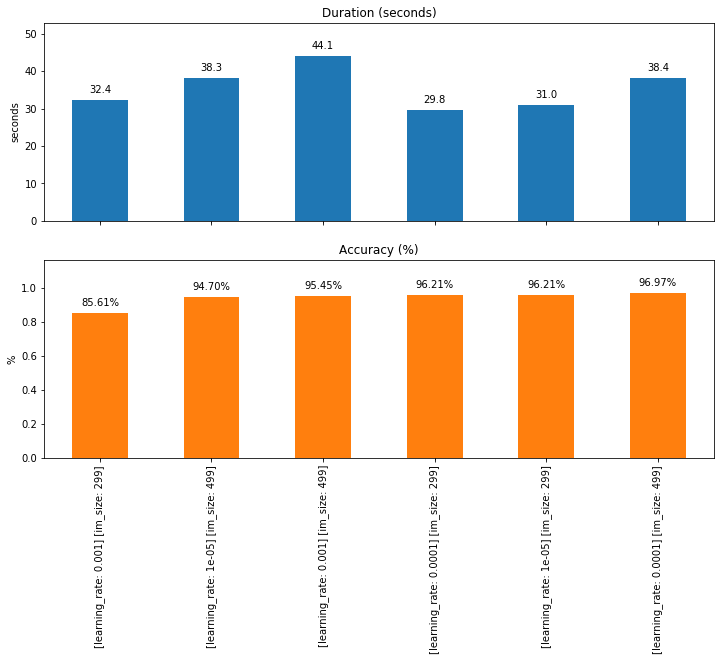

In [10]:
plot_df(df.mean(level=(1)), sort_by="accuracy")

Based on these results, we can see that with a learning rate of 1e-4 and with an image size of 299, we get the best results.